#Analisa dataset Twitter "SpotifyWrapped" 2021 
Dataset diambil menggunakan teknik Crawling pada Twitter API <br />
Source Code and Dataset: https://github.com/AriqF/SpotifyWrapped_ID_21

##Import library

In [26]:
import pandas as pd
import os
import csv
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from io import StringIO

import warnings
warnings.filterwarnings('ignore')

##Read Dataset

In [27]:
data = pd.read_csv("spotifyDataset.csv")
data.head()

,created_at,text,username
0,2021-12-10 01:48:23+00:00,Aura audio 2021 saya. Visualisasikan pengalama...,WonderKid-
1,2021-12-10 01:47:30+00:00,Lagu teratas saya di 2021. Kalau kamu? #Spotif...,WonderKid-
2,2021-12-10 01:47:18+00:00,"Tahun ini, saya mendengarkan selama 48.350 men...",WonderKid-
3,2021-12-10 01:46:25+00:00,"Kalau 2021 adalah sebuah film, inilah soundtra...",WonderKid-
4,2021-12-10 01:43:18+00:00,"Terima kasih, @pearljam, karena telah menghabi...",Canis Lupus Occidentalis


##Data Cleaning


*   Drop unused columns
*   Remove chars, link, numbers, and symbol
*   Split sentence into word

In [28]:
data.drop('created_at', inplace=True, axis=1)
data.drop('username', inplace=True, axis=1)
data.head()

,text
0,Aura audio 2021 saya. Visualisasikan pengalama...
1,Lagu teratas saya di 2021. Kalau kamu? #Spotif...
2,"Tahun ini, saya mendengarkan selama 48.350 men..."
3,"Kalau 2021 adalah sebuah film, inilah soundtra..."
4,"Terima kasih, @pearljam, karena telah menghabi..."


In [29]:
def remove_chars():
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_.&+]|[!*\(\)]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|#[a-zA-Z]+|$[a-zA-Z]+|[.^_$*%-;鶯!?:]+|\[a-zA-Z]+|[a-zA-Z]\[a-zA-Z]')
    data['text'] = data['text'].replace(r'\\[a-zA-Z]',  '', regex=True)
    for i in range(len(data["text"])):
        data["text"][i] = pattern.sub('', data["text"][i])


remove_chars()

In [30]:
data['text'] = data['text'].str.split()
data.head()

,text
0,"[Aura, audio, saya, Visualisasikan, pengalaman..."
1,"[Lagu, teratas, saya, di, Kalau, kamu]"
2,"[Tahun, ini, saya, mendengarkan, selama, menit..."
3,"[Kalau, adalah, sebuah, film, inilah, soundtra..."
4,"[Terima, kasih, @pearljam, karena, telah, meng..."


##Separate artist tag and tweets

In [31]:
res_arr = np.array([])
for i in range(len(data['text'])):
  for j in range(len(data.text[i])):
    #check if tweets is tagging official acc and not tagging Spotify
    if('@' in data.text[i][j] and '@Spotify' not in data.text[i][j]): 
      np_arr = data.text[i][j]
      res_arr = np.append(res_arr, np_arr)
      df_art = pd.DataFrame(res_arr, columns =['artist'])

print(df_art)

                artist
0            @pearljam
1           @btsbighit
2           @btsbighit
3     @KakungTriadmojo
4           @txtbighit
...                ...
2236   @oneokrockjapan
2237        @txtbighit
2238        @edsheeran
2239     @bmthofficial
2240       @sushitrash

[2241 rows x 1 columns]


##Generate Wordcloud

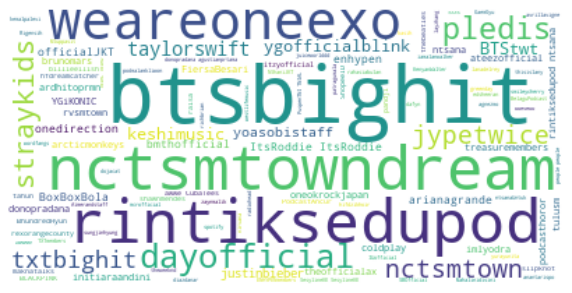

In [32]:
artist = " ".join(review for review in df_art.artist)
wordcloud = WordCloud(background_color="white").generate(artist)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##Top 10 Artist Visualization

###Top 10 Artist Dataframe

In [33]:
append_art = np.array([])
append_con = np.array([])
df_topTen = df_art.artist.value_counts().nlargest(10)

for i in range(len(df_topTen)):
  #artist
  np_art = np.array(df_topTen.index.tolist()[i])
  #counts
  np_con = np.array(df_topTen[i])
  #append
  append_art = np.append(append_art, np_art)
  append_con = np.append(append_con, np_con)
  #passing data to dataframe
  df_top = pd.DataFrame(append_art, columns=['artist'])
  df_top['count'] = append_con

df_top

,artist,count
0,@btsbighit,178.0
1,@rintiksedupod,102.0
2,@nctsmtowndream,81.0
3,@dayofficial,57.0
4,@weareoneexo,52.0
5,@pledis,46.0
6,@straykids,36.0
7,@jypetwice,32.0
8,@txtbighit,32.0
9,@taylorswift,31.0


###Bar chart visualization

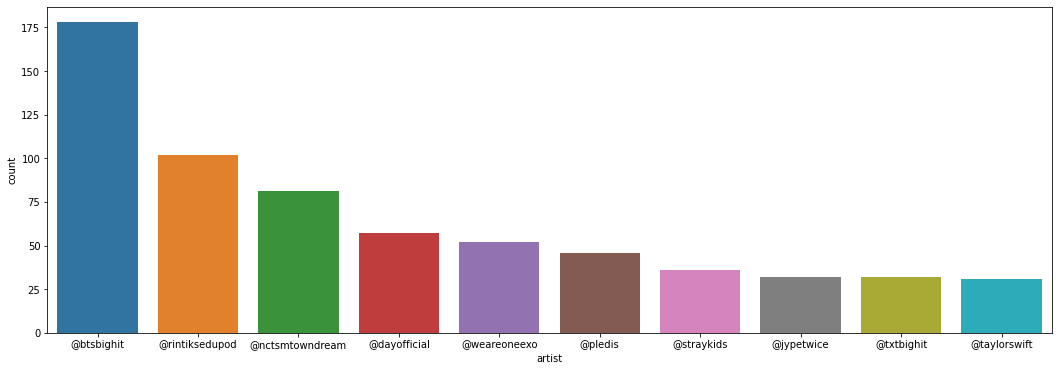

In [34]:
plt.figure(figsize=(18,6))
sns.barplot(x='artist', y='count', data=df_top);
plt.show()

In [35]:
# for i in range(len(df_top)):
#   for j in range(len(data['text'])):
#     if(df_top['artist'] in )

print(df_topTen)
print(df_top['artist'][0])

@btsbighit         178
@rintiksedupod     102
@nctsmtowndream     81
@dayofficial        57
@weareoneexo        52
@pledis             46
@straykids          36
@jypetwice          32
@txtbighit          32
@taylorswift        31
Name: artist, dtype: int64
@btsbighit
